In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

path = "/content/drive/My Drive/PROJECT 1001/processed_dataset.csv"
data = pd.read_csv(path)
data = data.drop(['Unnamed: 0', 'ARR_DELAY', 'DISTANCE', 'TIME_DEP_DEL15', 'DelayScore', 'DelayScore_DEST', 'DELAY_PROB', 'DELAY_PROB_DEST', 'QUARTER'], axis=1)
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ARR_DEL15,AIR_TIME,PRCP,WDSP,VISIB,SLP,DELAY_TO_NO_DELAY_RATIO,DELAY_NO_DELAY_RATIO_DEST,TIME_GROUP_NUM,TIME_ARR_DEL15,TIME_ARR_DELAY,TIME_DEP_DELAY,CARRIER_TAXI_OUT,CARRIER_CARRIER_DELAY,CARRIER_NAS_DELAY,ORIGIN_TAXI_OUT,ORIGIN_CARRIER_DELAY,ORIGIN_NAS_DELAY,ORIGIN_LATE_AIRCRAFT_DELAY
0,1,30,2,0.0,251.0,0.02,11.6,10.0,1025.7,0.189537,0.146626,3,0.166133,1.575064,6.714174,18.168675,18.388806,17.685694,17.055532,18.620341,13.052774,21.548829
1,1,27,6,0.0,107.0,0.00,7.0,10.0,1030.8,0.189537,0.189076,6,0.273603,11.905879,17.489085,18.168675,18.388806,17.685694,17.055532,18.620341,13.052774,21.548829
2,1,22,1,0.0,79.0,0.00,5.5,8.4,1019.4,0.189537,0.239775,4,0.204976,5.457473,10.194971,18.168675,18.388806,17.685694,17.055532,18.620341,13.052774,21.548829
3,1,8,1,0.0,192.0,0.00,7.9,9.4,1026.6,0.189537,0.148148,3,0.166133,1.575064,6.714174,18.168675,18.388806,17.685694,17.055532,18.620341,13.052774,21.548829
4,1,15,1,0.0,50.0,0.00,4.8,10.0,1031.7,0.189537,0.350877,6,0.273603,11.905879,17.489085,23.094947,21.991548,12.894312,17.055532,18.620341,13.052774,21.548829


In [0]:
X = data.drop('ARR_DEL15', axis=1)
y = data['ARR_DEL15']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=42, stratify=y_train)

print(len(X_train))
print(len(X_test))
print(len(X_val))

147571
105408
98381


Only a few tests done considering the time complexity. This is inefficient.

In [0]:
# Setting range for parameters
num_neighbor = np.arange(5, 21, 5)
leaf_sizes = np.arange(20, 51, 10)

5 20
5 30
5 40
5 50
10 20
10 30
10 40
10 50
15 20
15 30
15 40
15 50
20 20
20 30
20 40
20 50


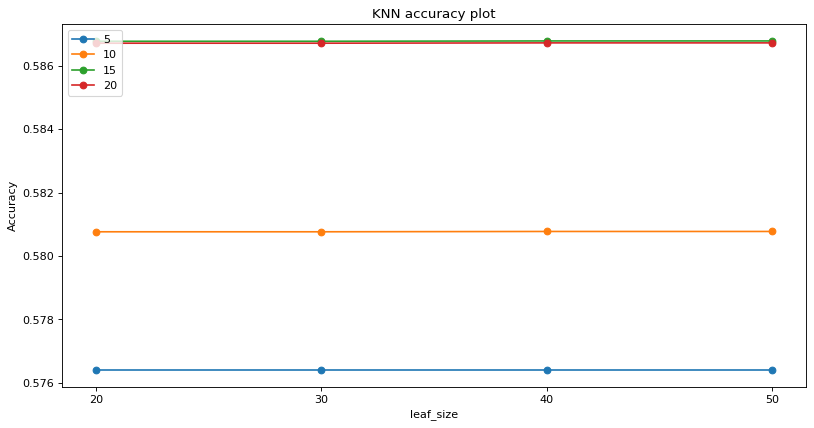

In [0]:
# K-nearest neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

results = []
best_accuracy = 0
best_n_neighbor = 0
best_leaf_size = 0

for i in num_neighbor:
    result = []
    for j in leaf_sizes:
        clf = KNeighborsClassifier(n_neighbors=i, leaf_size=j)
        clf.fit(X_train, y_train)
        print(i, j)
        accuracy = clf.score(X_val, y_val)
        if accuracy >= best_accuracy:
            best_accuracy = accuracy
            best_n_neighbor = i
            best_leaf_size = j
        result.append(accuracy)
    results.append(result)

# Plot validation accuracies
fig=plt.figure(figsize=(12, 6), dpi= 80)
for i in range(len(results)):
    plt.plot(leaf_sizes, results[i], marker='o', linestyle='-', label=num_neighbor[i])
plt.xlabel('leaf_size')
plt.ylabel('Accuracy')
plt.xticks(leaf_sizes)
plt.title('KNN accuracy plot')
plt.legend(loc='upper left')
plt.show()

In [0]:
print(best_accuracy)
print(best_n_neighbor)
print(best_leaf_size)

0.5867799676766855
15
50


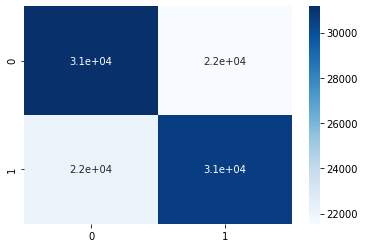

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

clf = KNeighborsClassifier(n_neighbors=best_n_neighbor, leaf_size=best_leaf_size)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
# Accuracy on test data
sns.heatmap(conf, annot=True, cmap='Blues')